1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


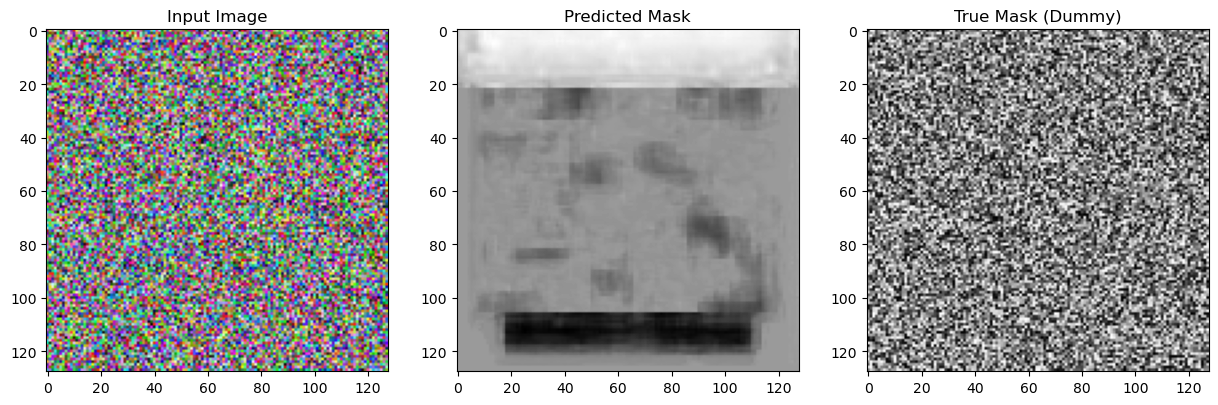

Sample Prediction after epoch 20

804/804 ━━━━━━━━━━━━━━━━━━━━ 659s 819ms/step - accuracy: 0.0218 - loss: 0.6797 - val_accuracy: 0.0221 - val_loss: 0.6821


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set random seed for reproducibility
tf.random.set_seed(42)

# Load and preprocess your data
def load_data(image_dir, mask_dir, img_size=(128, 128)):
    images = []
    masks = []
    
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name)  # Assumes masks have the same filenames as images

           if os.path.exists(mask_path):  # Ensure the mask exists
            # Load image and apply enhancements if required
            image = load_img(img_path, target_size=img_size)
            image = img_to_array(image) / 255.0  # Normalize to [0, 1]

            # Apply image enhancement techniques like Gaussian blur, sharpening
            if enhance:
                image = filters.gaussian(image, sigma=1)  # Apply Gaussian Blur for noise reduction
                image = exposure.adjust_sigmoid(image, cutoff=0.5, gain=10)  # Adjust contrast

            images.append(image)

            mask = load_img(mask_path, target_size=img_size, color_mode='grayscale')
            mask = img_to_array(mask) / 255.0  # Normalize to [0, 1]
            masks.append(mask)

    return np.array(images), np.array(masks)

# Create U-Net model
def create_unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Upsampling
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Display predictions after each epoch
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print('Sample Prediction after epoch {}\n'.format(epoch + 1))

def show_predictions():
    # Use a sample from the validation dataset
    test_image = np.random.rand(1, 128, 128, 3)  # For demonstration purposes

    # Predict the mask
    predicted_mask = model.predict(test_image)

    # Display the images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(test_image[0])

    plt.subplot(1, 3, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('True Mask (Dummy)')
    plt.imshow(np.random.rand(128, 128), cmap='gray')  # Replace with actual true mask if available

    plt.show()

# Load data
image_directory = 'C:\\Users\\Sasindu\\Downloads\\archive\\cars_train\\cars_train'  # Update with your image directory
mask_directory = 'C:\\Users\\Sasindu\\Downloads\\archive\\cars_test\\cars_test'      # Update with your mask directory
images, masks = load_data(image_directory, mask_directory)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Create the model
input_shape = images.shape[1:]  # Example: (128, 128, 3)
model = create_unet_model(input_shape)

# Set training parameters
EPOCHS = 20
BATCH_SIZE = 8

# Create training and validation datasets
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

# Fit the model
model_history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[DisplayCallback()])


C:\Users\Sasindu\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_432']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


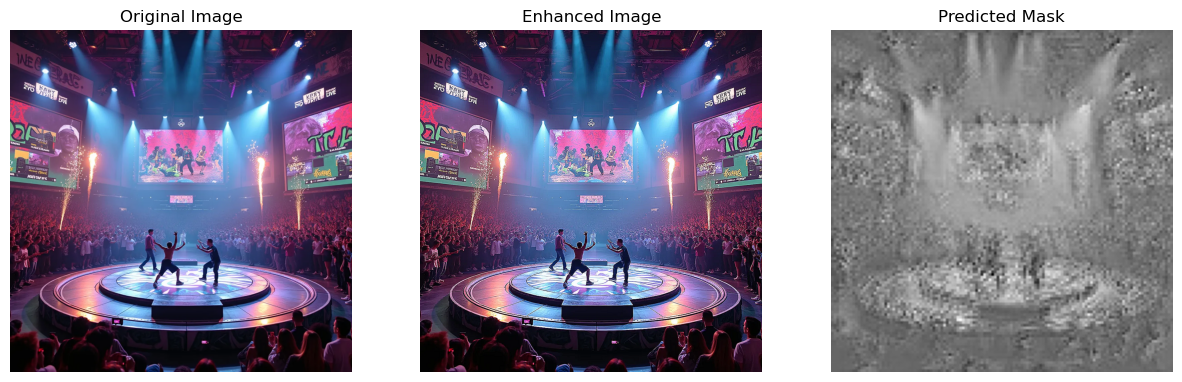

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# Load the U-Net model architecture
def create_unet_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Upsampling
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Load the model weights
input_shape = (128, 128, 3)  # Example input shape
model = create_unet_model(input_shape)
model.load_weights('C:\\Users\\Sasindu\\Downloads\\my_model.h5')  # Load your trained model weights

# Function to upload and process the image
def process_image():
    # Function to upload an image
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename()

    if file_path:
        # Load and enhance the image
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

        # Enhance the image (Sharpening)
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
        enhanced_image = cv2.filter2D(image, -1, kernel)

        # Prepare the image for model input
        test_image = cv2.resize(enhanced_image, (128, 128))  # Resize for model input
        test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
        test_image = test_image / 255.0  # Normalize to [0, 1]

        # Predict the mask
        predicted_mask = model.predict(test_image)

        # Display the results
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(image)
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('Enhanced Image')
        plt.imshow(enhanced_image)
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Predicted Mask')
        plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.show()
    else:
        print("No image selected.")

# Run the process
process_image()
